In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
imdb_awards = pd.read_csv('data/scrap/imdb_awards.csv')
cmu_movies = pd.read_csv("data/cmu_movies.csv", sep="\t")
top1000_movies = pd.read_csv('data/scrap/top1000_IMDB_movies.csv')

In [15]:
# Merge cmu_movies with imdb_awards on freebase_id
merged_cmu_awards = pd.merge(cmu_movies, imdb_awards, on='freebase_id', how='inner')

# Merge the above result with top1000_movies on imdb_id
final_merged_data = pd.merge(merged_cmu_awards, top1000_movies, on='imdb_id', how='inner')

In [16]:
# You may need to clean or prepare your data. For example, handle missing values or convert data types if necessary
final_merged_data.dropna(inplace=True)  # Example: Remove rows with missing values

In [17]:
final_merged_data.head()

,wikipedia_id,freebase_id_x,title_x,release_date,revenue,runtime,languages,countries,genres_x,imdb_id,...,year,duration,genres_y,number_of_ratings,rating,director,description,freebase_id_y,metacritic_id_y,metascore
0,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",tt0058331,...,1964,139 min,"Comedy, Family, Fantasy",181825,7.8,Robert Stevenson,"In turn of the century London, a magical nanny...",/m/0kcn7,movie/mary-poppins,88.0
1,1031231,/m/03_wh5,"Black Cat, White Cat",1998-09-10,351447.0,135.0,"{""/m/012psb"": ""Romani language"", ""/m/02bjrlw"":...","{""/m/0f8l9c"": ""France"", ""/m/087vz"": ""Yugoslavi...","{""/m/06cvj"": ""Romantic comedy"", ""/m/01z4y"": ""C...",tt0118843,...,1998,127 min,"Comedy, Crime, Romance",55719,8.0,Emir Kusturica,Matko and his son Zare live on the banks of th...,/m/03_wh5,movie/black-cat-white-cat,73.0
3,748616,/m/03813g,"Spring, Summer, Fall, Winter... and Spring",2003-08-14,9524745.0,95.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea"", ""/m/0345h"": ""Germa...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",tt0374546,...,2003,103 min,"Drama, Romance",85772,8.0,Kim Ki-duk,A boy is raised by a Buddhist monk in an isola...,/m/03813g,movie/spring-summer-fall-winter-and-spring,85.0
5,4836072,/m/0cq7kw,My Fair Lady,1964-10-21,72000000.0,172.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04xvh5"": ""Costume drama"", ""/m/0520lz"": ""R...",tt0058385,...,1964,170 min,"Drama, Family, Musical",99781,7.8,George Cukor,"In 1910s London, snobbish phonetics professor ...",/m/0cq7kw,movie/my-fair-lady,95.0
6,504242,/m/02j9_2,Serenity,2005-08-22,38869464.0,119.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt0379786,...,2005,119 min,"Action, Adventure, Sci-Fi",302980,7.8,Joss Whedon,The crew of the ship Serenity try to evade an ...,/m/02j9_2,movie/serenity,74.0


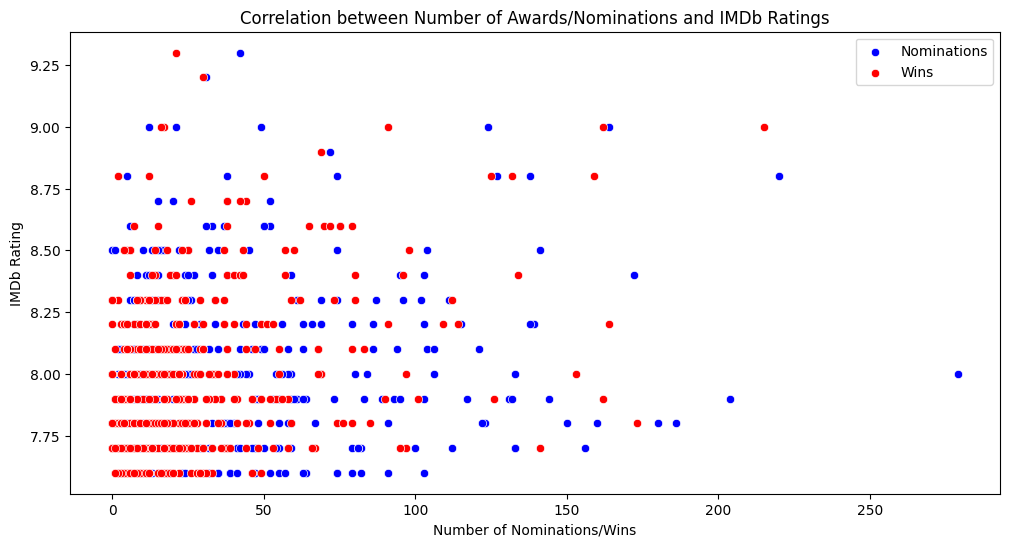

In [18]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_merged_data, x='nominations', y='rating', color='blue', label='Nominations')
sns.scatterplot(data=final_merged_data, x='wins', y='rating', color='red', label='Wins')
plt.title('Correlation between Number of Awards/Nominations and IMDb Ratings')
plt.xlabel('Number of Nominations/Wins')
plt.ylabel('IMDb Rating')
plt.legend()
plt.show()


In [19]:
# Create bins for nominations and wins for grouping
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]  # Adjust bins as needed
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']

# Add binned columns to the dataframe
final_merged_data['nomination_range'] = pd.cut(final_merged_data['nominations'], bins=bins, labels=labels, right=False)
final_merged_data['wins_range'] = pd.cut(final_merged_data['wins'], bins=bins, labels=labels, right=False)

# Aggregate data
grouped_data = final_merged_data.groupby(['nomination_range', 'wins_range']).agg({'rating': 'mean'}).reset_index()

In [20]:
# Pivot the data for the bar chart
pivot_data = grouped_data.pivot("nomination_range", "wins_range", "rating")

C:\Users\97455\AppData\Local\Temp\ipykernel_27192\1354873637.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = grouped_data.pivot("nomination_range", "wins_range", "rating")


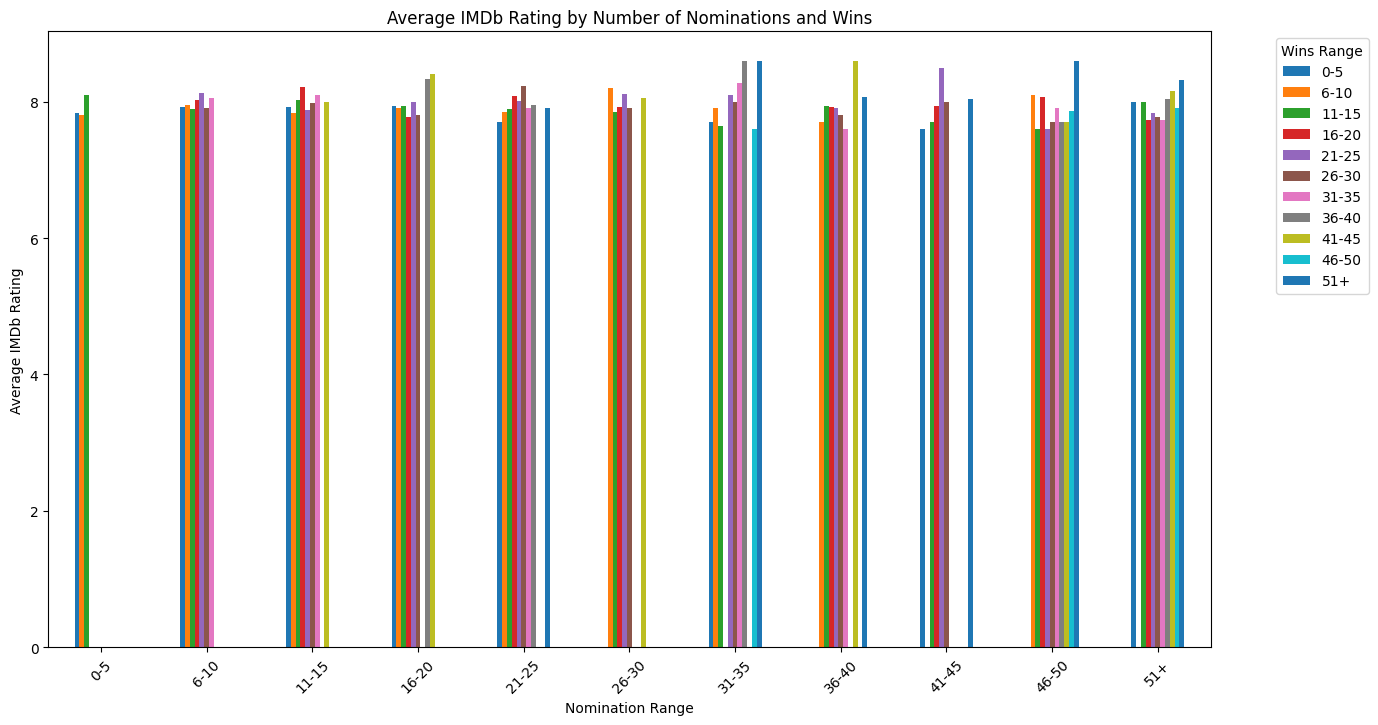

In [21]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
pivot_data.plot(kind='bar', ax=ax)
ax.set_title('Average IMDb Rating by Number of Nominations and Wins')
ax.set_xlabel('Nomination Range')
ax.set_ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.legend(title='Wins Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
# Split the genres and explode them into separate rows
genre_data = top1000_movies['genres'].str.split(',').explode()

In [29]:
# Normalize the genre strings by stripping leading/trailing spaces and converting to lower case
top1000_movies['genres'] = top1000_movies['genres'].str.lower().str.strip()

# Replace any known duplicates or variations
top1000_movies['genres'] = top1000_movies['genres'].str.replace('biography', 'bio', regex=False)

# Further cleaning if there are other known issues like 'crimes' should be 'crime'
# Add similar lines for other inconsistencies you've identified
top1000_movies['genres'] = top1000_movies['genres'].str.replace('crimes', 'crime', regex=False)

# Now split and explode the genres again
genre_data = top1000_movies['genres'].str.split(',').explode().str.strip()

In [30]:
# Count the occurrences of each genre
genre_counts = genre_data.value_counts()
print (genre_counts)

drama        737
comedy       227
action       206
crime        206
adventure    186
thriller     143
romance      127
bio          107
mystery      100
animation     82
sci-fi        66
fantasy       61
family        52
war           49
history       47
music         32
horror        32
film-noir     22
western       17
musical       16
sport         15
Name: genres, dtype: int64


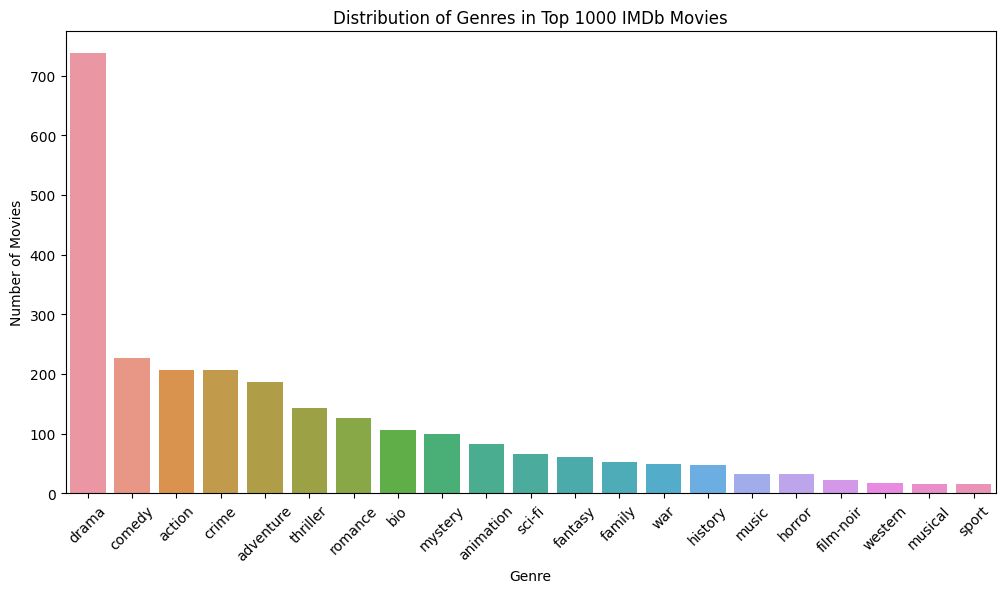

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Genres in Top 1000 IMDb Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [52]:
top1000_movies['duration'] = top1000_movies['duration'].str.replace(' min', '').astype(int)

In [54]:
top1000_movies = top1000_movies.dropna(subset=['duration'])

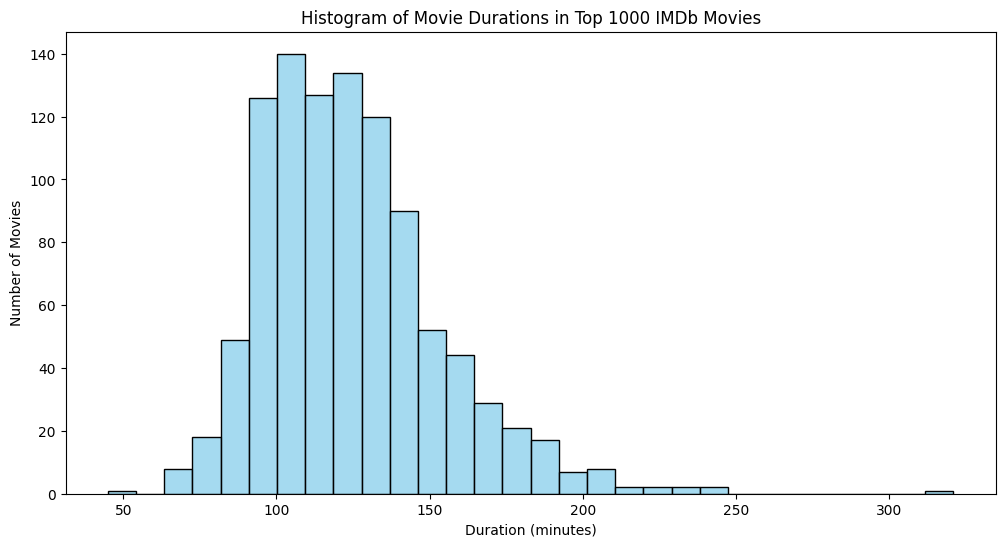

In [56]:
#plot the histogram for movie durations
plt.figure(figsize=(12, 6))
sns.histplot(top1000_movies['duration'], kde=False, color='skyblue', bins=30)
plt.title('Histogram of Movie Durations in Top 1000 IMDb Movies')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [57]:
# If we also want to see the correlation between duration and rating,
# we need to make sure that 'rating' is also a numeric column and there are no NaN values.
top1000_movies['rating'] = pd.to_numeric(top1000_movies['rating'], errors='coerce')
top1000_movies = top1000_movies.dropna(subset=['rating'])
top1000_movies.head()

,imdb_id,title,year,duration,genres,number_of_ratings,rating,director,description,freebase_id,metacritic_id,metascore
0,tt0111161,The Shawshank Redemption,1994,142,Drama,2818031,9.3,Frank Darabont,"Over the course of several years, two convicts...",/m/07jnt,movie/the-shawshank-redemption,82.0
1,tt0068646,The Godfather,1972,175,"Crime, Drama",1963969,9.2,Francis Ford Coppola,"Don Vito Corleone, head of a mafia family, dec...",/m/07g1sm,movie/the-godfather,100.0
2,tt0468569,The Dark Knight,2008,152,"Action, Crime, Drama",2799537,9.0,Christopher Nolan,When the menace known as the Joker wreaks havo...,/m/0btpm6,movie/the-dark-knight,84.0
3,tt0108052,Schindler's List,1993,195,"Biography, Drama, History",1416535,9.0,Steven Spielberg,"In German-occupied Poland during World War II,...",/m/0hfzr,movie/schindlers-list,95.0
4,tt0167260,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",1929790,9.0,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,/m/017jd9,movie/the-lord-of-the-rings-the-return-of-the-...,94.0


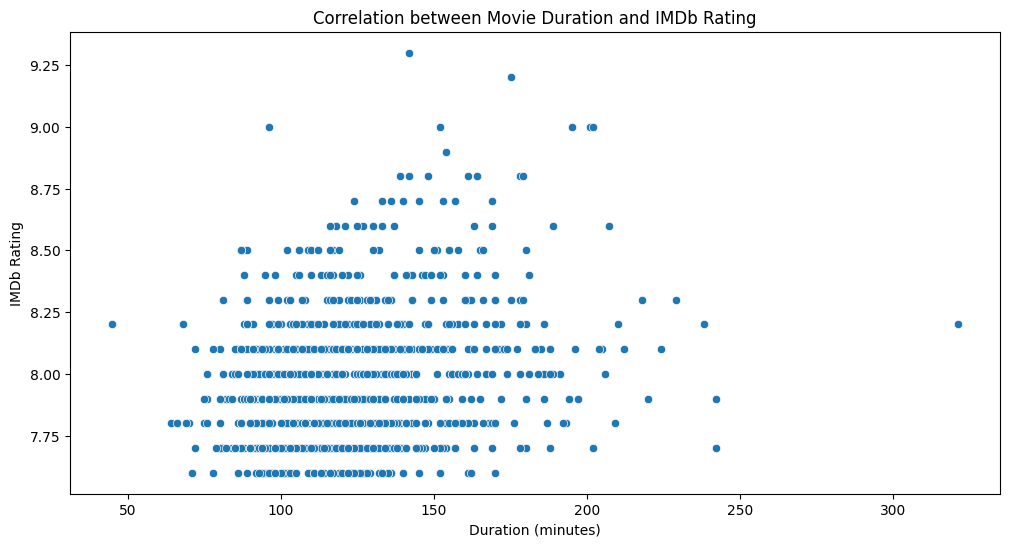

In [58]:
# Plotting the correlation between movie duration and IMDb rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration', y='rating', data=top1000_movies)
plt.title('Correlation between Movie Duration and IMDb Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

### Director Success Rate: Directors with the most movies in the top 1000 list, including their average movie rating.

In [59]:
# Extract director names and ratings from the dataset
# Assuming there are columns named 'director' and 'rating' in your dataset
# Group by director, count the number of movies and calculate the average rating
director_stats = top1000_movies.groupby('director').agg(
    movies_count=pd.NamedAgg(column='title', aggfunc='size'),
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean')
).reset_index()

In [67]:
# Sort directors by the number of movies they have in the top 1000 list
director_stats.sort_values(by='movies_count', ascending=False, inplace=True)

In [74]:
top_20=director_stats.head(20)

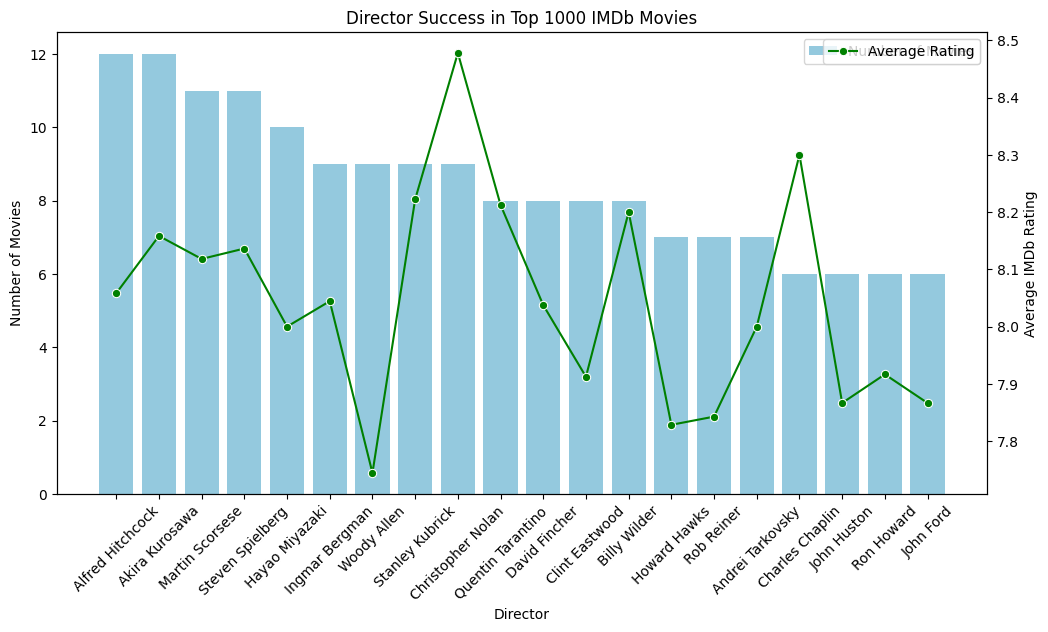

In [91]:
# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='movies_count', data=top_20,
            color='skyblue', label='Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Director Success in Top 1000 IMDb Movies')
plt.xticks(rotation=45)
plt.legend()

# Add a secondary y-axis for the average rating
ax2 = plt.twinx()
sns.lineplot(x='director', y='average_rating', data=top_20,
             color='green', marker='o', label='Average Rating')
ax2.set_ylabel('Average IMDb Rating')
plt.legend(loc='upper right')


plt.show()

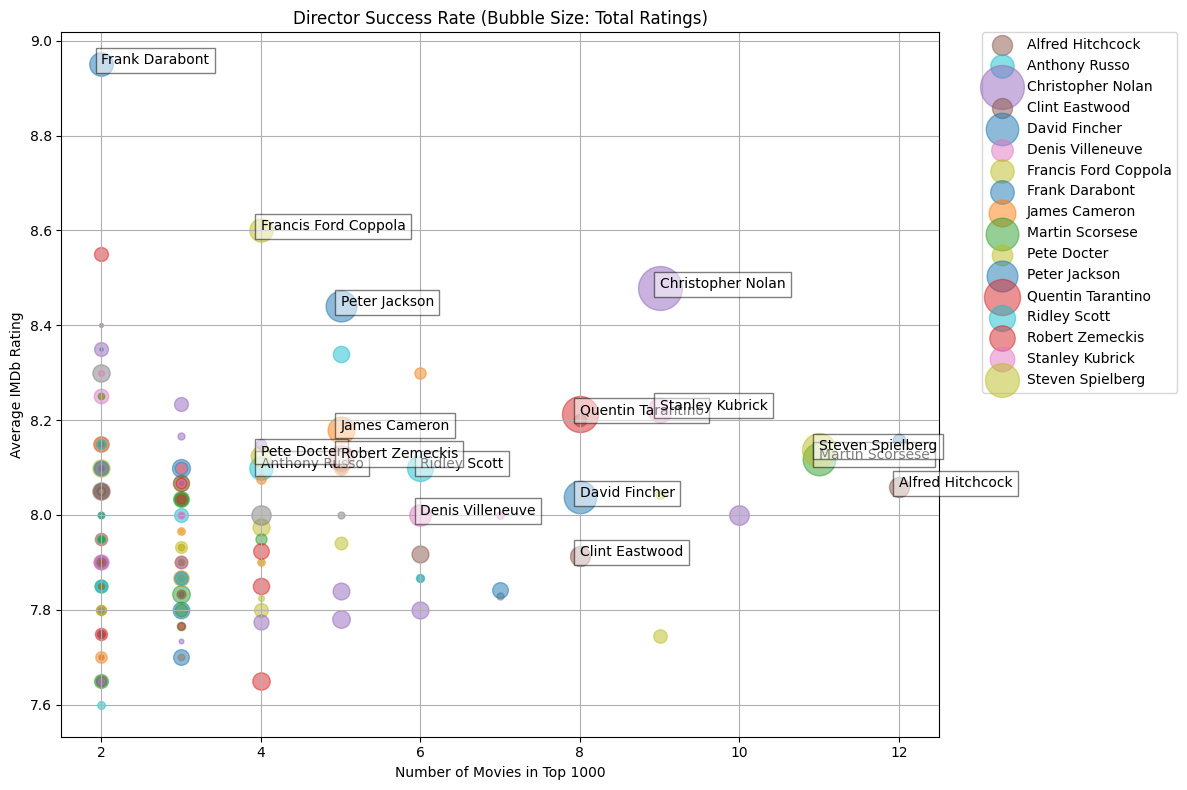

In [88]:
# Aggregate data
director_stats = top1000_movies.groupby('director').agg(
    movies_count=pd.NamedAgg(column='title', aggfunc='size'),
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean'),
    total_ratings=pd.NamedAgg(column='number_of_ratings', aggfunc='sum') # Example for bubble size
).reset_index()

# Filter for directors with a significant number of movies
director_stats = director_stats[director_stats['movies_count'] > 1]

# Adjust the bubble sizes
director_stats['bubble_size'] = director_stats['total_ratings'] / 1000
max_bubble_size = director_stats['bubble_size'].max()
director_stats['bubble_size'] = (director_stats['bubble_size'] / max_bubble_size) * 1000  # Normalize to a max size

# Plotting the bubble chart with improved readability
plt.figure(figsize=(12, 8))
for i, row in director_stats.iterrows():
    plt.scatter(
        row['movies_count'], 
        row['average_rating'], 
        s=row['bubble_size'], 
        alpha=0.5,
        label=row['director'] if row['bubble_size'] > 200 else ""  # Label only significant bubbles
    )

# Adding labels for the largest bubbles
for i in range(len(director_stats)):
    if director_stats.iloc[i]['bubble_size'] > 200:  # Threshold for labeling
        plt.text(x=director_stats.iloc[i]['movies_count'],
                 y=director_stats.iloc[i]['average_rating'],
                 s=director_stats.iloc[i]['director'],
                 fontdict=dict(color='black', size=10),
                 bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Number of Movies in Top 1000')
plt.ylabel('Average IMDb Rating')
plt.title('Director Success Rate (Bubble Size: Total Ratings)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

Cluster of Success: There is a cluster of directors who have a high number of movies in the top 1000 and also high average ratings (around 8 to 9). This cluster indicates a group of directors who are both prolific and critically successful.

Outliers: Some directors like Frank Darabont and Francis Ford Coppola have fewer movies in the top 1000 but have high average ratings, suggesting that their fewer works are very highly regarded.

Ratings vs. Quantity: Directors like Steven Spielberg and Martin Scorsese, who have a larger number of movies in the top 1000, have slightly lower average ratings compared to the outliers mentioned above. This could indicate a balance between quantity and the maintained quality of their films.

Popular Acclaim: The size of the bubbles for directors such as Christopher Nolan and Steven Spielberg is larger, indicating that their movies have received a high number of ratings. This suggests that their films are not only critically successful but also popular among the audience.

Highly Rated, Less Prolific: Some directors with smaller bubbles but high average ratings, such as Quentin Tarantino and Stanley Kubrick, might indicate that they have fewer films but those films are highly rated.

From this graph, we can infer that:

Directors with large bubbles and high on both axes are both critically acclaimed and popular among audiences.
Directors with smaller bubbles but high on the y-axis are critically acclaimed but may not have as wide an audience reach or may produce films less frequently.
Directors with a high number of movies (further along the x-axis) but lower average ratings may have a mix of critically acclaimed films and others that are less so.